In [1]:
import itertools
import warnings
from datetime import datetime

import geopandas
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')
geopandas.options.io_engine = "pyogrio"
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from plotting import plot_correlation, plot_parameter
import intervals

parameters = [
    "turbidity",
    "conductivity",
    "ecoli"
]

shoal_edge_parameters = intervals.joined_parameters_query(parameters, [intervals.location_2222])
shoal_edge_parameters = shoal_edge_parameters.dropna()

shoal_edge_parameters.describe()

,avg_value_turbidity,median_value_turbidity,max_value_turbidity,min_value_turbidity,start_date,avg_value_conductivity,median_value_conductivity,max_value_conductivity,min_value_conductivity,avg_value_ecoli,median_value_ecoli,max_value_ecoli,min_value_ecoli
count,29.000000,29.000000,29.000000,29.000000,29,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2.003621,1.987069,2.243793,1.793103,2011-06-08 21:31:02.068965632,497.450230,482.525517,556.747931,452.861724,372.838506,367.724138,537.196552,210.775862
min,0.600000,0.600000,0.600000,0.550000,2000-01-11 00:00:00,318.000000,318.000000,328.800000,303.000000,6.000000,6.000000,6.000000,1.000000
25%,1.100000,1.100000,1.220000,1.040000,2006-04-09 00:00:00,407.000000,407.000000,440.300000,379.100000,77.450000,77.450000,111.900000,23.000000
50%,1.700000,1.700000,1.710000,1.450000,2011-03-14 00:00:00,465.550000,465.500000,493.000000,433.000000,221.700000,221.700000,224.700000,111.900000
75%,2.950000,2.680000,3.170000,2.350000,2016-10-13 00:00:00,549.600000,540.000000,625.000000,540.000000,520.000000,530.000000,648.800000,240.000000
max,4.540000,4.540000,5.300000,4.540000,2023-05-10 00:00:00,855.666667,759.000000,1720.000000,759.000000,1855.000000,1855.000000,3250.000000,1040.000000
std,1.068797,1.050092,1.312420,1.014270,NaN,125.211353,105.672298,252.247421,108.519188,421.977278,415.087755,746.481985,265.623221


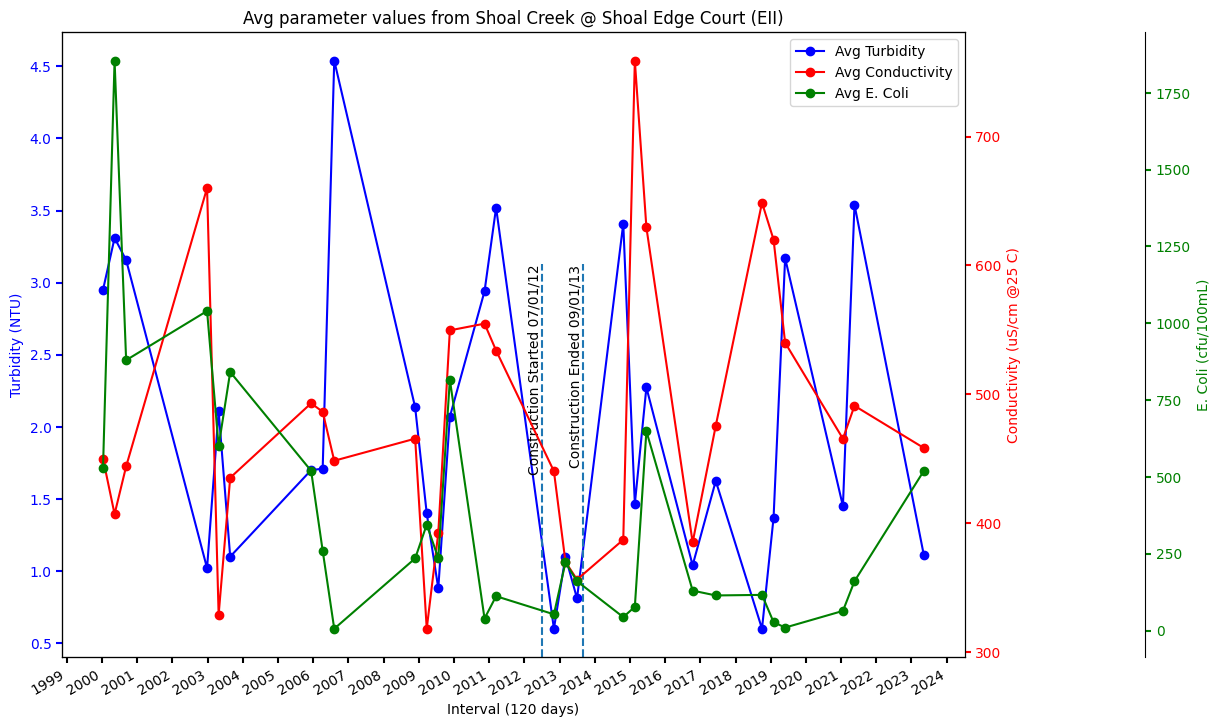

In [3]:
plot_parameter(shoal_edge_parameters, 'avg', f'Avg parameter values from {intervals.location_2222}')

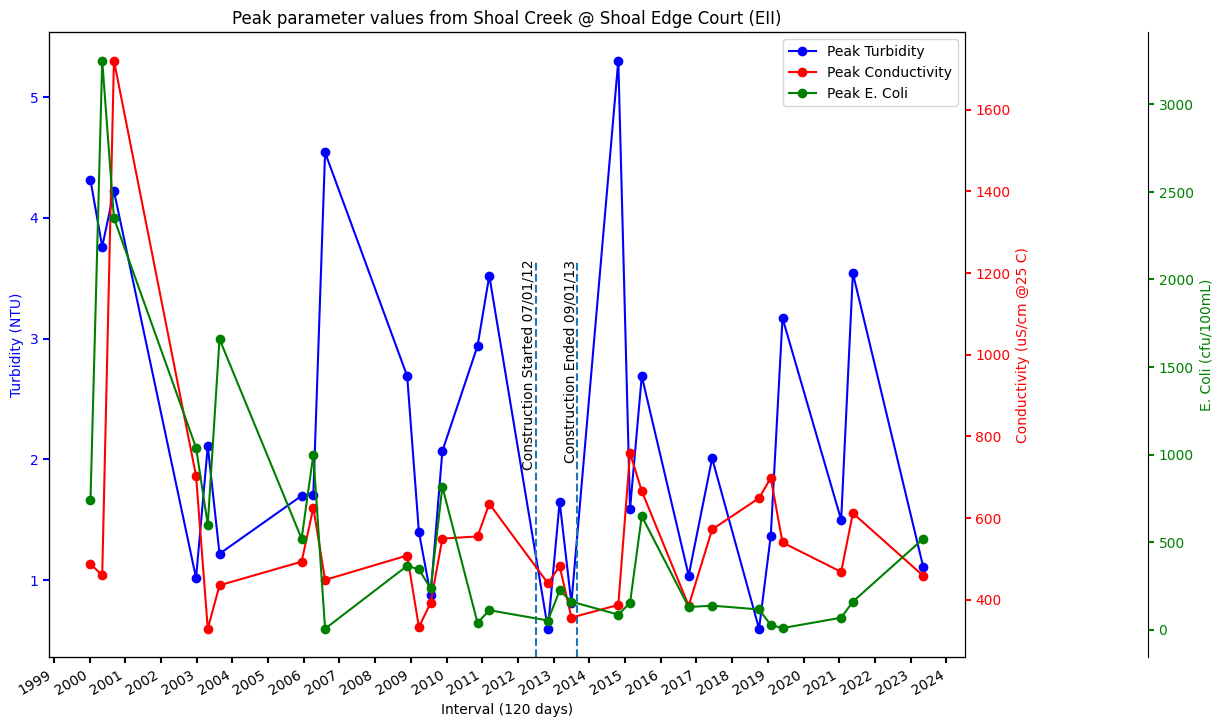

In [4]:
plot_parameter(shoal_edge_parameters, 'max', f'Peak parameter values from {intervals.location_2222}')